In [82]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [83]:
def start_spins(L, pos_prop):
    coords = np.meshgrid(range(L), range(L))
    spin_list = np.random.rand(L * L) 
    spin_list = np.where(spin_list < pos_prop, 1, -1)
    spin_list = spin_list.reshape(L,L)
    return coords, spin_list


In [178]:
def get_e_flip(spin_loc, spin_list):
    row, col = spin_loc[0], spin_loc[1]
    l = len(spin_list)
    j = 1 #coupling constant
    
    #flip spin to calculate energy IF spin was flipped
    left_ind  = (col - 1) % l
    right_ind = (col + 1) % l
    up_ind    = (row - 1) % l
    down_ind  = (row + 1) % l
    #get spin we are calculating energy for
    spin = spin_list[row][col] * -1
    #get values of nearest neighbors spins
    nn_left  = spin_list[row][left_ind]
    nn_right = spin_list[row][right_ind]
    nn_up    = spin_list[up_ind][col]
    nn_down  = spin_list[down_ind][col]

    e_flip = ((nn_left * spin) + (nn_right * spin) +
                  (nn_up * spin) + (nn_down * spin)) * -j
    
    return e_flip

In [179]:
def get_magnetism(spin_list):
    sum_spins = sum(spin_list.flatten())
    n = len(spin_list)
    magnetisation = sum_spins/n**2
    
    return magnetisation

In [180]:
def simulate_ising(T, L, n_step, pos_prop=0.5):
    mag_list = list()
    coords, spin_list = start_spins(L, pos_prop)
    kT = 1 * T
    
    for step in range(n_step):
        
        for row, vals in enumerate(spin_list):
            
            for col, spin in enumerate(vals):
                spin_loc = [row, col]
                e_flip = get_e_flip(spin_loc, spin_list)

                if e_flip <= 0:
                    spin_list[row][col] = -spin
                else:
                    rand_num = np.random.rand()
                    p_flip = np.exp(-e_flip/kT)

                    if rand_num <= p_flip:
                        spin_list[row][col] = spin
                        
        mag_list.append(get_magnetism(spin_list))
    
    # mag_list = np.asarray(mag_list)/L
    
    return coords, spin_list, mag_listdef get_e_flip(spin_loc, spin_list):




In [181]:
coords, spin_list, mag_list = simulate_ising(4, 10, n_step=1000)

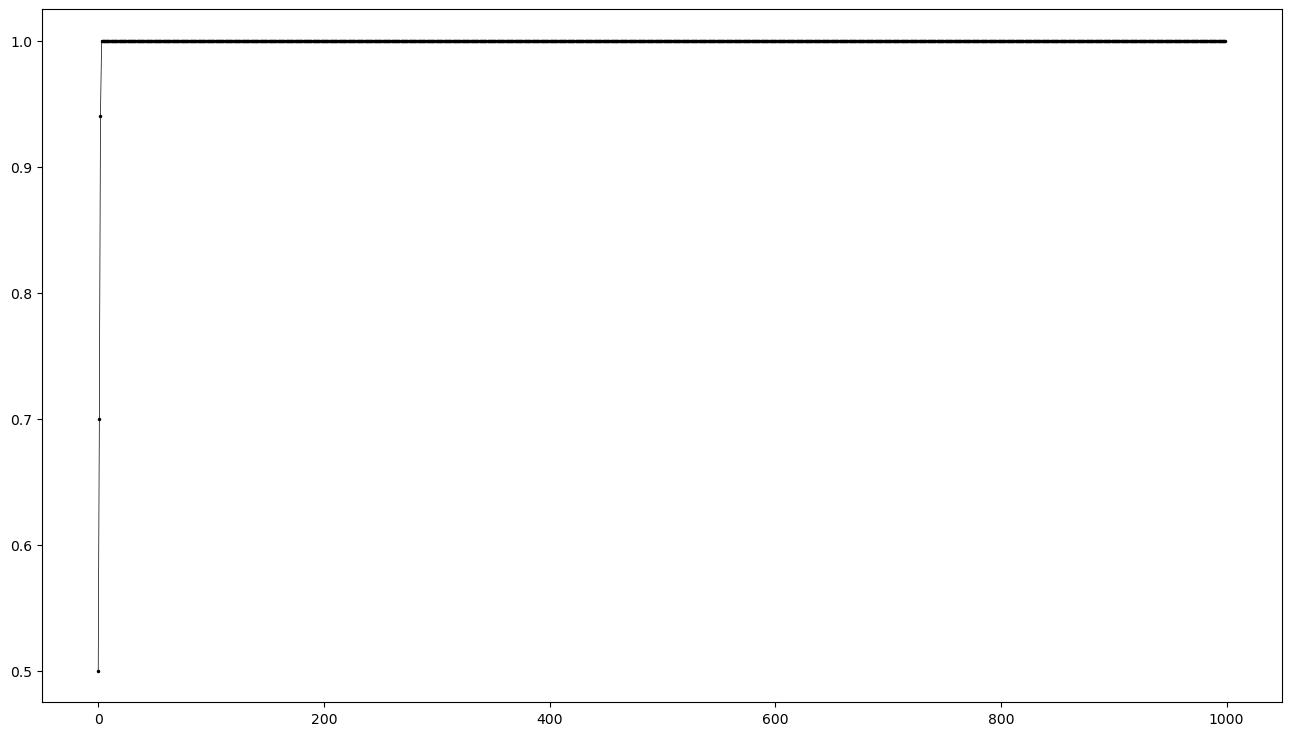

In [182]:
fig, ax = plt.subplots( figsize=(16,9))

plt.plot(mag_list, "k.-", linewidth=0.5, markersize=3)

plt.show()

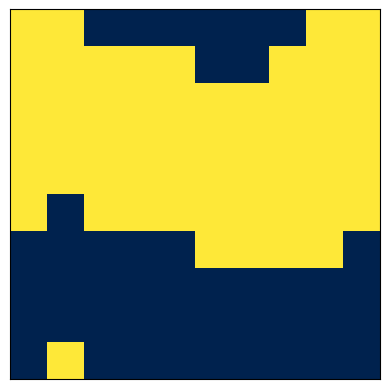

In [111]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')


plt.pcolormesh(coords[0], coords[1], spin_list, cmap="cividis")


# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

plt.show()

array([0.1, 0.5, 0.8])